# Machine Learning Online Class - Exercise 1: Linear Regression

## Ex1

## Warmup Exercise 
Instructions: Return the 5x5 identity matrix 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def warmupExercise():
    return np.eye(5)

warmupExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## Plotting

In [3]:
data = pd.read_csv('ex1data1.txt', names=['X','y'])
X = data.X
X = X.values.reshape((len(X),1))
y = data.y
y = y.values.reshape((len(y),1))

# data shape and sample
print('Training samples :')
print(f'{X.shape}')
print(f'{X[:10,:]}')
print()
print('Training targets')
print(f'{y.shape}')
print(f'{X[:10,:]}')
print()

Training samples :
(97, 1)
[[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]
 [8.3829]
 [7.4764]
 [8.5781]
 [6.4862]
 [5.0546]]

Training targets
(97, 1)
[[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]
 [8.3829]
 [7.4764]
 [8.5781]
 [6.4862]
 [5.0546]]



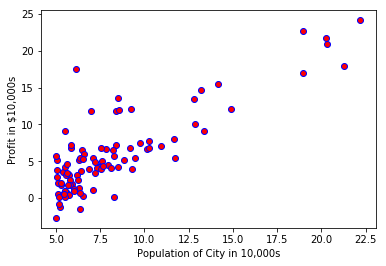

In [4]:
plt.scatter(data.X, data.y, c='red', edgecolor='blue')
plt.ylabel('Profit in $10,000s');
plt.xlabel('Population of City in 10,000s');
plt.show()

In [5]:
X = np.append(np.ones((len(X),1)), X, axis=1)
print(f'augumented X : \n {X[:10,:]}')

augumented X : 
 [[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]
 [1.     8.3829]
 [1.     7.4764]
 [1.     8.5781]
 [1.     6.4862]
 [1.     5.0546]]


## Cost Function and Gradient Descent 

In [6]:
def computeCost(X, y, theta):
    m = len(X)
    J = (1/(2 * m)) * np.sum((X.dot(theta) - y) ** 2)
    return J

In [7]:
theta = np.zeros((2,1))

# some gradient descent setting 
alpha = 0.01
iterations = 1500

print("Testing the cost function ...\n")

J = computeCost(X, y, theta)
print(f'With theta = [0 ; 0]\nCost computed = {J}')
print('Expected cost value (approx) 32.07\n');

J = computeCost(X, y, np.array([[-1],[2]]));
print(f'\nWith theta = [-1 ; 2]\nCost computed = {J}');
print('Expected cost value (approx) 54.24\n');

Testing the cost function ...

With theta = [0 ; 0]
Cost computed = 32.072733877455676
Expected cost value (approx) 32.07


With theta = [-1 ; 2]
Cost computed = 54.24245508201238
Expected cost value (approx) 54.24



In [8]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(X)
    J_history = np.zeros((iterations,1))

    for i in range(iterations):

        theta = theta - (alpha/m) * np.sum((X.dot(theta) - y) * X, axis=0).reshape(np.shape(theta))

        J_history[i] = computeCost(X,y,theta)

    return (theta, J_history)

In [9]:
print('\nRunning Gradient Descent ...\n')

(theta, J_history) = gradientDescent(X, y, theta, alpha, iterations);

print('Theta found by gradient descent:\n');
print(f'{theta}');
print('Expected theta values (approx)\n');
print(' -3.6303\n  1.1664\n\n');


Running Gradient Descent ...

Theta found by gradient descent:

[[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)

 -3.6303
  1.1664




## Plotting the linear fit

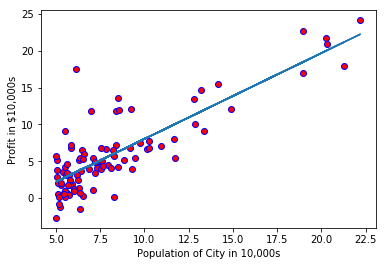

In [10]:
plt.scatter(data.X, data.y, c='red', edgecolor='blue')
plt.ylabel('Profit in $10,000s');
plt.xlabel('Population of City in 10,000s');
plt.plot(X[:,1],X.dot(theta).reshape(len(X),))
plt.show()

In [11]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot(np.array([1, 3.5]),theta);
print(f'For population = 35,000, we predict a profit of {predict1*10000}');
predict2 = np.dot(np.array([1, 7]) ,theta);
print(f'For population = 70,000, we predict a profit of {predict2*10000}');

For population = 35,000, we predict a profit of [4519.7678677]
For population = 70,000, we predict a profit of [45342.45012945]


## Ex1_multi

In [12]:
# load dataset
data = pd.read_csv('ex1data2.txt', names=['Size','NoOfBr','Price'])
X = data.values[:, :2]
y = data.values[:, 2].reshape(len(X),1)
m = len(X)

print(f'Training samples : \n{X[:10,:]}')
print(f'\nTarget samples : \n{y[:10,:]}\n')

Training samples : 
[[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]
 [1985    4]
 [1534    3]
 [1427    3]
 [1380    3]
 [1494    3]]

Target samples : 
[[399900]
 [329900]
 [369000]
 [232000]
 [539900]
 [299900]
 [314900]
 [198999]
 [212000]
 [242500]]



## Feature Normalization

In [13]:
def featureNormalize(X):
    X_norm = X.astype('float64')
    X_norm -= np.mean(X_norm)
    X_norm /= np.std(X_norm)
    return X_norm

In [14]:
print('Normalizing Features ...\n')
X_norm = featureNormalize(X)

X_norm = np.append(np.ones((len(X_norm),1)), X_norm, axis=1)
print(f'Augmented and normalized X norm : \n{X_norm[:10, :]}')

Normalizing Features ...

Augmented and normalized X norm : 
[[ 1.          0.96415008 -0.87391021]
 [ 1.          0.52322557 -0.87391021]
 [ 1.          1.22310574 -0.87391021]
 [ 1.          0.36225314 -0.87478506]
 [ 1.          1.74801587 -0.87303536]
 [ 1.          0.86004291 -0.87303536]
 [ 1.          0.46548546 -0.87391021]
 [ 1.          0.37187649 -0.87391021]
 [ 1.          0.33075853 -0.87391021]
 [ 1.          0.43049145 -0.87391021]]


In [15]:
print('Running Gradient Descent ...\n')

alpha = 0.01
num_iters = 400

theta = np.zeros((3,1))
(theta, J_history) = gradientDescent(X_norm, y, theta, alpha, num_iters)

print('Theta computed from gradient descent: \n');
print(f'{theta}');
print('\n');

Running Gradient Descent ...

Theta computed from gradient descent: 

[[ 119999.41363909]
 [ 148539.68555667]
 [-104839.19814394]]




In [16]:
price = np.dot(np.array([[1 ,1650, 3]]),theta)
print(f'Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): {price}')

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): [[2.44895963e+08]]


## Normal Equation

In [17]:
def normalEq(X, y):
    theta = np.dot(X.transpose(), y)
    theta = np.dot(np.linalg.inv(np.dot(X.transpose(),X)),theta)
    return theta

In [18]:
print('Using normal equation ...\n')

X_aug = np.append(np.ones((len(X),1)), X, axis=1)
theta = normalEq(X_aug, y)
print(f'theta using normal equation : \n {theta}\n')

price = np.dot(np.array([[1, 1650, 3]]), theta)

print(f'Predicted price of a 1650 sq-ft, 3 br house (using normal equations):\n  {price}')

Using normal equation ...

theta using normal equation : 
 [[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
  [[293081.46433489]]
